In [2]:
#liberando Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [23]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [24]:
def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.flip(np.unique(y_true)))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.flip(np.unique(y_true)), columns=np.flip(np.unique(y_true)))
    cm.index.name = 'Real'
    cm.columns.name = 'Valor Predito'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [4]:
path_dataset = '/content/drive/My Drive/UFPR/aplicacao_ciencia_dados/trabalho_disciplina/dataset/training_dataset.csv'
data = pd.read_csv(path_dataset)

In [5]:
X = data[data.columns[:-1]]
y = data[data.columns[-1:]]

In [6]:
X_tree = X[['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'URL_of_Anchor','Links_in_tags', 'web_traffic']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_tree, y, test_size=0.2, random_state=42)

#Train Split

In [8]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [14]:
model_train_split = RandomForestClassifier()

In [15]:
parameter = {'bootstrap': True, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 50}

In [16]:
model_train_split.set_params(**parameter)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
model_train_split.fit(X_train_split,y_train_split.to_numpy().ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
y_pred_split = model_train_split.predict(X_test_split)

In [21]:
acc=accuracy_score(y_test_split,y_pred_split)
f1=f1_score(y_test_split,y_pred_split)
matt=matthews_corrcoef(y_test_split,y_pred_split)
erro=mean_absolute_error(y_test_split,y_pred_split)
precision=precision_score(y_test_split,y_pred_split)
recall=recall_score(y_test_split,y_pred_split)

In [22]:
print('Erro: {0:.4f}'.format(erro))
print('Precision: {0:.4f}'.format(precision))
print('Recall: {0:.4f}'.format(recall))
print('F1-score: {0:.4f}'.format(f1))
print('Acurácia: {0:.4f}'.format(acc))
print('Coeficiente de Matthews: {0:.4f}'.format(matt))

Erro: 0.1232
Precision: 0.9259
Recall: 0.9635
F1-score: 0.9443
Acurácia: 0.9384
Coeficiente de Matthews: 0.8763


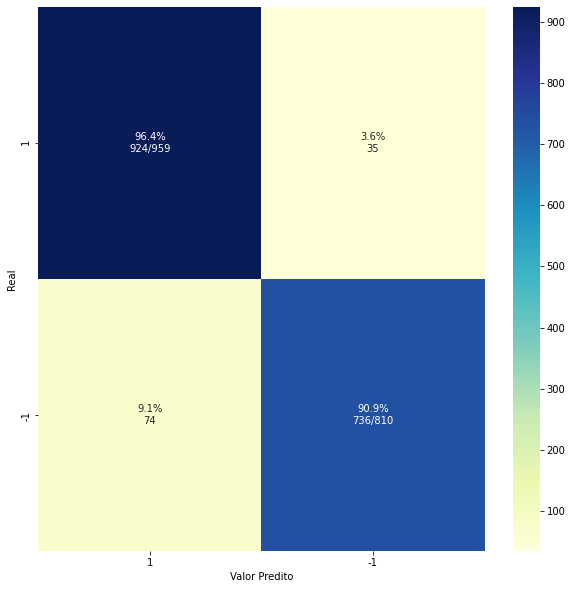

In [25]:
plot_cm(y_test_split,y_pred_split)

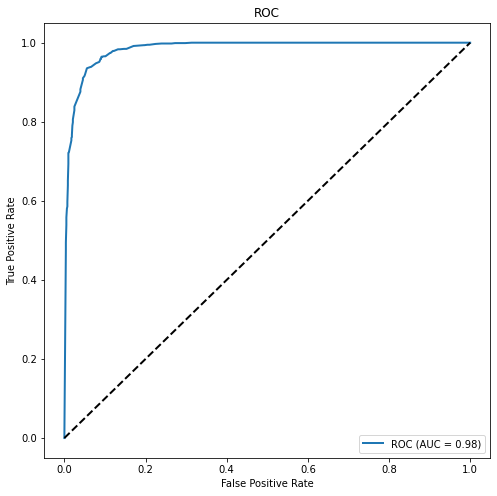

In [39]:
fig1 = plt.figure(figsize=[8,8])
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

prediction = model_train_split.predict_proba(X_test_split)
fpr, tpr, t = roc_curve(y_test_split, prediction[:, 1])
tprs.append(np.interp(mean_fpr, fpr, tpr))
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=2, alpha=1, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

plt.show()

#Test Split

In [40]:
model = RandomForestClassifier()

In [41]:
parameter = {'bootstrap': True, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 50}

In [42]:
model.set_params(**parameter)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
model.fit(X_train, y_train.to_numpy().ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
y_pred=model.predict(X_test)

In [45]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
matt=matthews_corrcoef(y_test,y_pred)
erro=mean_absolute_error(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

In [46]:
print('Erro: {0:.4f}'.format(erro))
print('Precision: {0:.4f}'.format(precision))
print('Recall: {0:.4f}'.format(recall))
print('F1-score: {0:.4f}'.format(f1))
print('Acurácia: {0:.4f}'.format(acc))
print('Coeficiente de Matthews: {0:.4f}'.format(matt))

Erro: 0.1185
Precision: 0.9343
Recall: 0.9633
F1-score: 0.9486
Acurácia: 0.9408
Coeficiente de Matthews: 0.8793


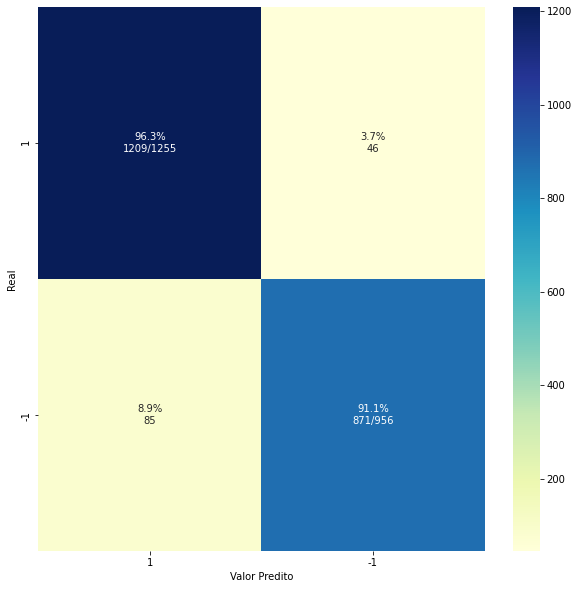

In [47]:
plot_cm(y_test,y_pred)

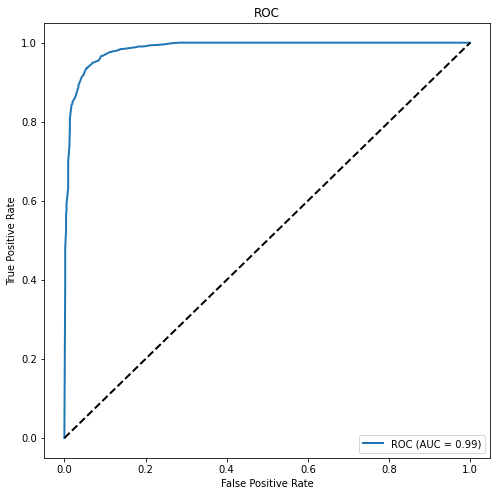

In [48]:
fig1 = plt.figure(figsize=[8,8])
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
prediction = model.predict_proba(X_test)
fpr, tpr, t = roc_curve(y_test, prediction[:, 1])
tprs.append(np.interp(mean_fpr, fpr, tpr))
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=2, alpha=1, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

plt.show()